<a href="https://colab.research.google.com/github/Nithyavaishu16/assignment-2-probability-and-statistics/blob/main/assignment_2_probability_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Statistics and Probability: Fundamentals

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objects as pg
import plotly.express as px

# probability

In [5]:
def toss_coin(number_of_tosses=100):
    return pd.Series(np.random.choice(['Heads', 'Tails'], number_of_tosses))

def throw_dice(number_of_tosses=100):
    return pd.Series(np.random.randint(1, 6+1, number_of_tosses))

In [6]:
results = toss_coin()
print(results.value_counts())
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

Heads    53
Tails    47
Name: count, dtype: int64


# Derived Probability Distributions

In [7]:
results = pd.Series([np.sum(toss_coin(20) == 'Heads') for _ in range(1000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [8]:
results = pd.Series([np.sum(toss_coin(500) == 'Heads') for _ in range(5000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

# sample

In [9]:
results = {shots: throw_dice(shots) for shots in [10, 100, 1000, 10000, 1000000]}
fig = pg.Figure([pg.Bar(x=result.value_counts().keys(),
                        y=result.value_counts().values / shots,)
                    for shots, result in results.items()])
fig.add_shape(type='line', x0=0.5, y0=1/6, x1=6.5, y1=1/6, line=dict(color='Red',))
fig.show()

1.If you have a shuffled deck of 52 cards, there are 4 aces, 4 kings, 4 queeens, 4 jacks, and 4 of each numbered card from 2 to 10. What is the probability that if you draw a card at random it will be a numbered card.

In [10]:
def number_of_numbered_cards_drawn_before_ace(trials=100, show_trials=10):
    values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    ranks = ['H', 'D', 'C', 'S']

    cards_thrown_counts = []
    for experiment in range(trials):
        deck_of_cards = [value + rank for value in values for rank in ranks]
        cards_thrown = 0
        cards_pile = []
        while len(deck_of_cards) > 0:
            picked_card = np.random.choice(deck_of_cards)
            cards_pile.append(picked_card)
            if picked_card[0] == 'A':
                break
            cards_thrown += 1
            deck_of_cards.remove(picked_card)
        if experiment < show_trials:
            print(cards_thrown, 'cards were thrown:', ' '.join(cards_pile))
        cards_thrown_counts.append(cards_thrown)

    return np.mean(cards_thrown_counts), cards_thrown_counts

expected_cards_thrown, cards_thrown_counts = number_of_numbered_cards_drawn_before_ace(10000)
print(f'\n{expected_cards_thrown} cards are tossed before we see the first ace!')

1 cards were thrown: 10H AD
9 cards were thrown: 6C 6H 8S 4C 8C QH JS 2H KH AC
9 cards were thrown: 10H 9H 4H 4S 8H QD 2H 3S 7C AD
14 cards were thrown: JS QH 5H 8S 3C 2H 8D 3S 4H 10S 4D 10H 6C 7S AH
20 cards were thrown: 2S KS 10H KD 7H 3H QD 9H 5C 8H 7C 9S 4S 2D 5H 10C JC 3S 9C KH AD
1 cards were thrown: 4C AC
6 cards were thrown: 10H QD 2D 3D 8C 3C AD
10 cards were thrown: 9D 5S 7C 5D 10C 4D 2S KD JD 10S AD
17 cards were thrown: JS 10C 3D 5C 3H 9C 3C JC 7S 9H 4S 5S JD 8D 10D 7C 6H AD
5 cards were thrown: QS KH 5C 3D KC AD

9.6674 cards are tossed before we see the first ace!


# Visualize the Underlying Probability Mass Function

In [11]:
results = pd.Series(cards_thrown_counts)
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

# Measurements and Errors

# Using Mean Squared Error

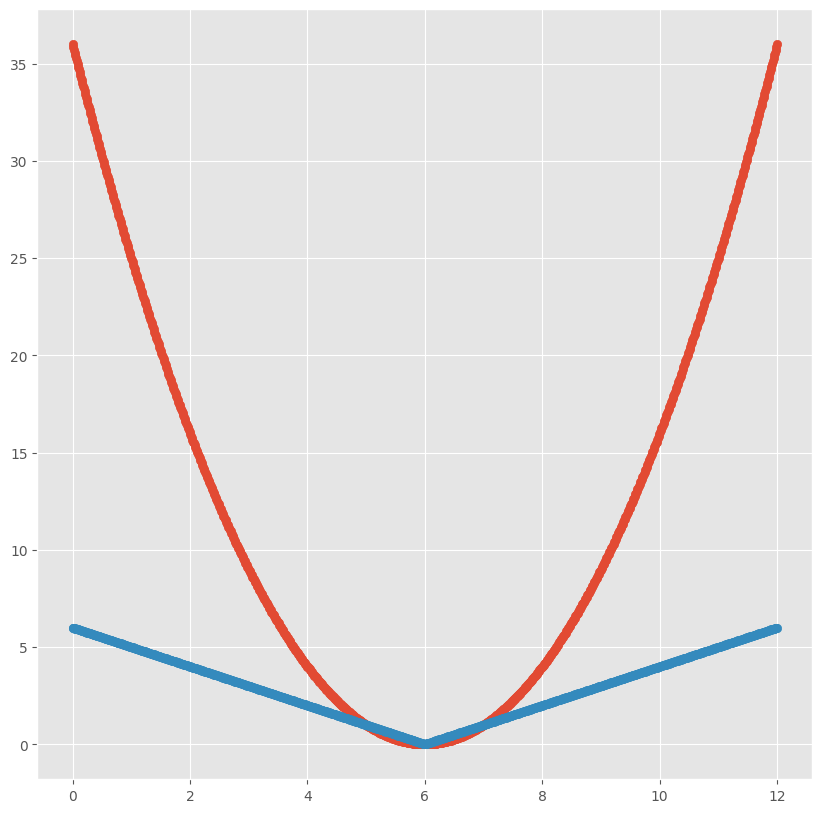

In [12]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

measurements = np.linspace(0, 12, 1000)
plt.scatter(measurements, (measurements - 6) ** 2, label='Squared Error')
plt.scatter(measurements, abs(measurements - 6), label='Absolute Error')
plt.show()

# Standardisation

In [18]:
grades = pd.read_csv("https://archive.org/download/ml-fundamentals-data/machine-learning-fundamentals-data/grades.csv")
print(grades.shape)
#grades.agg(["mean", "var", "std"])

(26, 4)


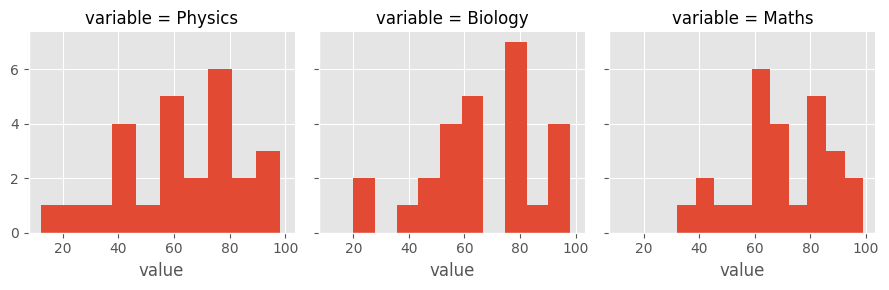

In [19]:
g = sns.FacetGrid(grades.melt("Name"), col="variable")
g.map(plt.hist, "value")

In [20]:
grades["Physics_std"] = (grades["Physics"] - grades["Physics"].mean()) / grades["Physics"].std()

In [21]:
grades.head()

,Name,Physics,Biology,Maths,Physics_std
0,Arnold,80,78,70,0.713673
1,Bob,60,98,45,-0.165735
2,Cassandra,34,56,65,-1.308965
3,Donovan,56,65,32,-0.341616
4,Emily,98,23,55,1.505141


In [25]:
grades["Maths_std"] = (grades["Maths"] - grades["Maths"].mean()) / grades["Maths"].std()
grades.head()

,Name,Physics,Biology,Maths,Physics_std,Maths_std
0,Arnold,80,78,70,0.713673,0.013309
1,Bob,60,98,45,-0.165735,-1.428471
2,Cassandra,34,56,65,-1.308965,-0.275047
3,Donovan,56,65,32,-0.341616,-2.178196
4,Emily,98,23,55,1.505141,-0.851759


# Binomial distribution

In [26]:
from scipy.stats import binom

In [27]:
binom.pmf(k=3, n=3, p=0.55)

0.16637500000000005

In [28]:
1 - binom.pmf(k=6, n=7, p=0.75) - binom.pmf(k=8, n=5, p=0.75)

0.68853759765625

In [29]:
binom.cdf(6, n=8, p=0.75)

0.6329193115234375

# Normal distribution

In [30]:
from scipy.stats import norm

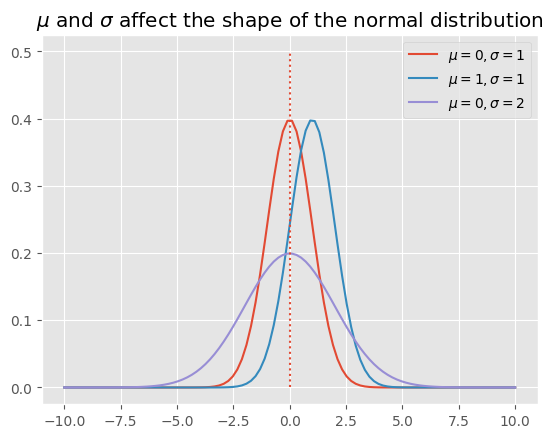

In [31]:
x = np.linspace(-10, 10, 100)
f1 = norm.pdf(x, loc=0, scale=1)
f2 = norm.pdf(x, loc=1, scale=1)
f3 = norm.pdf(x, loc=0, scale=2)

plt.plot(x, f1, label="$\mu=0, \sigma=1$")
plt.plot(x, f2, label="$\mu=1, \sigma=1$")
plt.plot(x, f3, label="$\mu=0, \sigma=2$")
plt.vlines(x=0, ymin=0, ymax=0.5, linestyles="dotted")

plt.legend()
plt.title("$\mu$ and $\sigma$ affect the shape of the normal distribution")
plt.show()

#### Programmatic solutions: percent point function


In [32]:
norm.cdf(0)

0.5

In [33]:
norm.ppf(0.3)

-0.5244005127080409

# Standard deviation rule/empirical rule

In [34]:
norm.ppf(0.94, loc=160.57, scale=8.57)

173.89440970569504

In [35]:
168.57 + 7.57

176.14

In [36]:
norm.ppf(0.0095, loc=199.57, scale=9.57)

177.12326860938012

In [37]:
169.79 - 5 * 7.57

131.94

# Poisson distribution

In [38]:
from scipy.stats import poisson

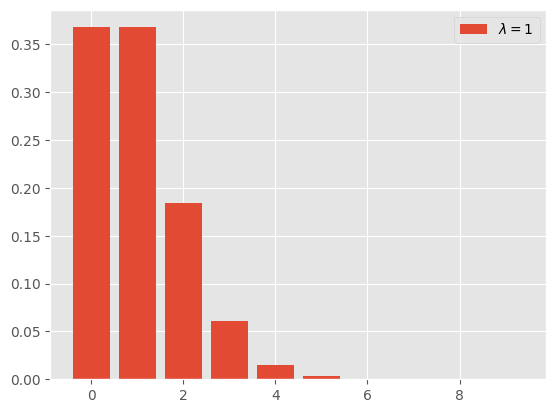

In [39]:
x = np.arange(10)
f1 = poisson.pmf(x, mu=1)
f2 = poisson.pmf(x, mu=2)
f3 = poisson.pmf(x, mu=3)

plt.bar(x, f1, label="$\lambda=1$")
plt.legend()

In [40]:
# the average can be calculated by multiplying the inputs with the values of the PMF
x @ f1
# see that this is equal to lambda

0.999998874797402

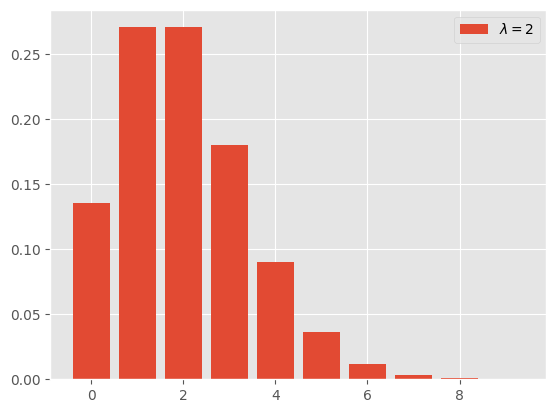

In [41]:
# for lambda=2, having 2 events is a lot more likely

plt.bar(x, f2, label="$\lambda=2$")
plt.legend()

In [42]:
x @ f2

1.999525105343477

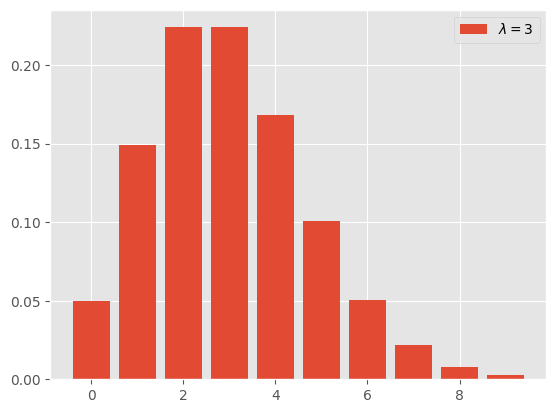

In [43]:
plt.bar(x, f3, label="$\lambda=3$")
plt.legend()

In [44]:
x @ f2

1.999525105343477

In [45]:
poisson.pmf(3, 8)

0.028626144247680996

# Central Limit Theorem

In [46]:
from scipy.stats import poisson

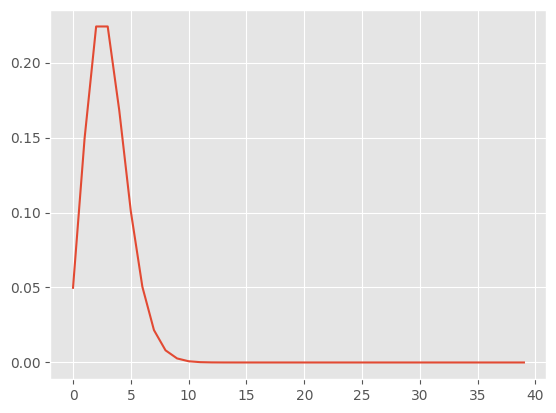

In [47]:
bins = np.arange(0, 40)
p_pois = poisson.pmf(bins, mu=3)
plt.plot(bins, p_pois)

(array([ 6., 11., 55., 77., 89., 67., 50., 25., 15.,  5.]),
 array([2.   , 2.205, 2.41 , 2.615, 2.82 , 3.025, 3.23 , 3.435, 3.64 ,
        3.845, 4.05 ]),
 <BarContainer object of 10 artists>)

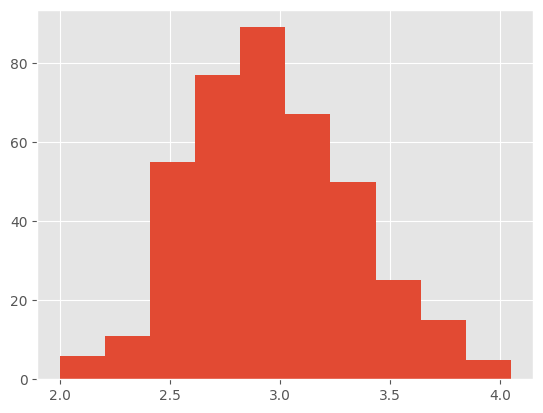

In [48]:
def sample_pois(_):
    samples = poisson.rvs(mu=3, size=20)
    return np.mean(samples)

means = list(map(sample_pois, np.arange(400)))
plt.hist(means)

# Using Normal Distribution in Weight Initialization

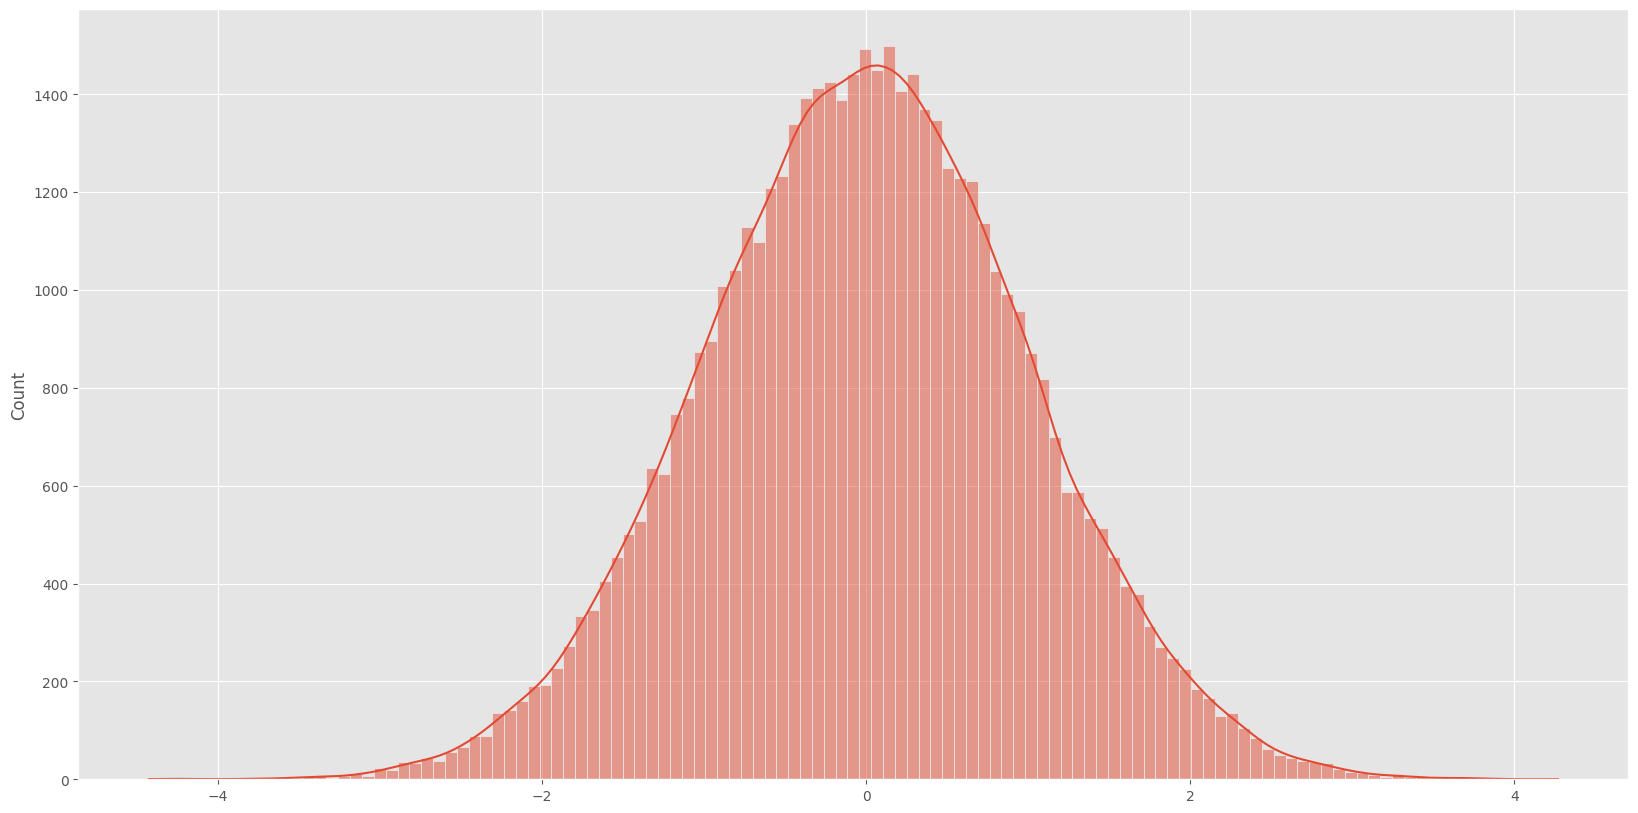

In [49]:
import seaborn as sns
plt.figure(figsize=(20, 10))
x = np.random.normal(size=(50000))
sns.histplot(x, kde=True)
plt.show()

# Entropy

# A solid-liquid-gas example

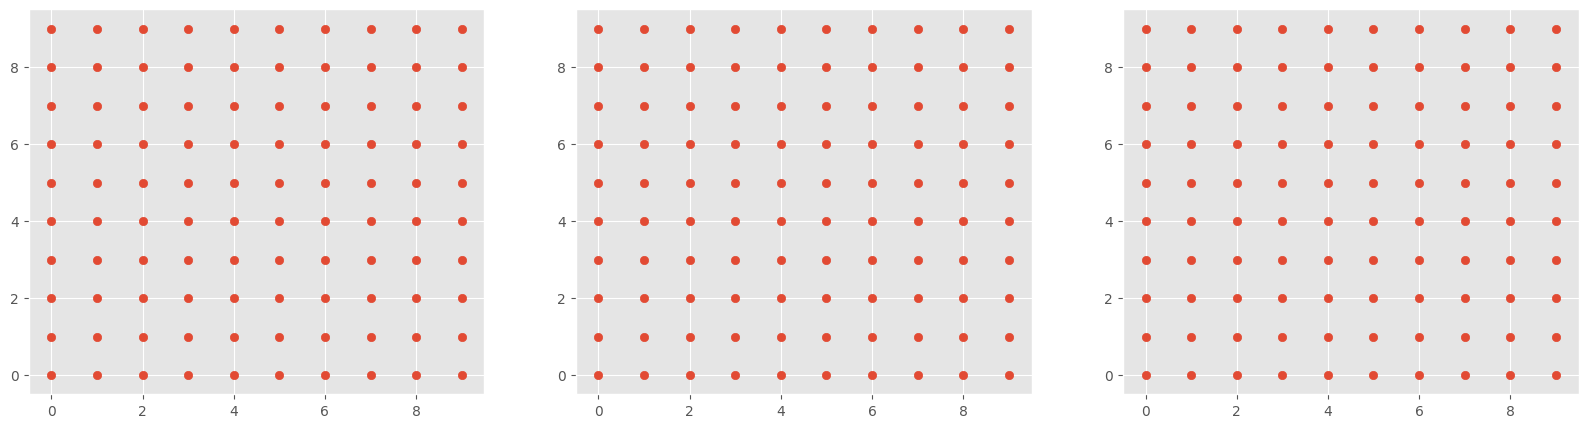

In [50]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.meshgrid(np.arange(10), np.arange(10))
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

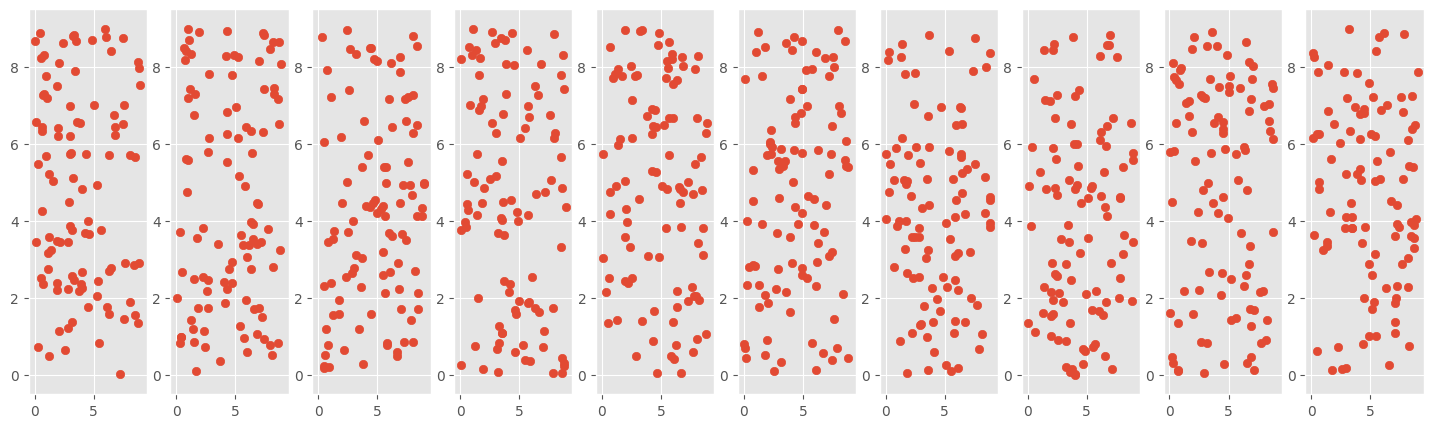

In [51]:
fix, axs = plt.subplots(1, 10, figsize=(18, 5))

for ax in axs:
    x, y = np.random.random(100) * 9, np.random.random(100) * 9
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

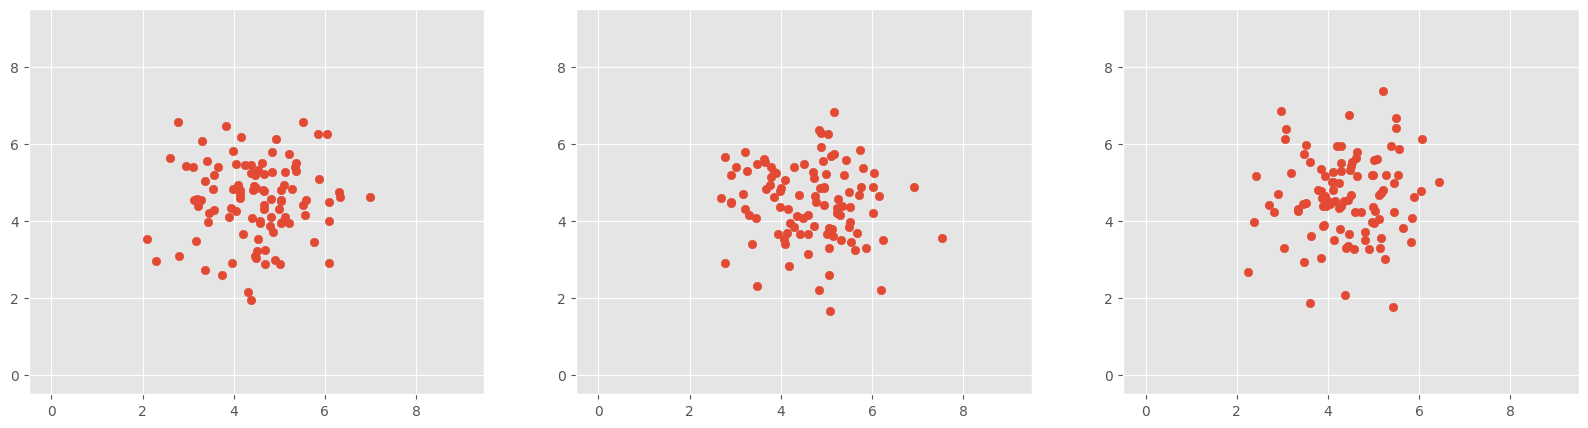

In [52]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.random.normal(loc=4.5, scale=1.0, size=100), np.random.normal(loc=4.5, scale=1.0, size=100)
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()